In [1]:
from ga_sampling import GASampler
from ts_main import run_ts
from baseline import read_input
from tqdm.auto import tqdm
import pandas as pd
import seaborn as sns
from scipy.stats import wilcoxon

In [2]:
num_iterations = 10
infile_name = "/Users/pwalters/software/TS/examples/quinazoline_fp_sim.json"

In [3]:
ga_df_list = []
for i in tqdm(range(0,num_iterations)):
    ga_sampler = GASampler(infile_name)
    ga_df = ga_sampler.run_ga()
    ga_df = ga_df.sort_values("score",ascending=False).head(100)
    ga_df['cycle'] = i 
    ga_df['method'] = 'GA'
    ga_df_list.append(ga_df)

  0%|          | 0/10 [00:00<?, ?it/s]

In [4]:
ts_df_list = []
for i in tqdm(range(0,num_iterations)):
    ts_input_dict = read_input(infile_name)
    ts_df = run_ts(ts_input_dict, hide_progress=True)
    ts_df = ts_df.sort_values("score",ascending=False).head(100)
    ts_df['cycle'] = i
    ts_df['method'] = 'TS'
    ts_df_list.append(ts_df)

  0%|          | 0/10 [00:00<?, ?it/s]

In [5]:
ga_combo_df = pd.concat(ga_df_list).sort_values("score",ascending=False).drop_duplicates("SMILES")

In [6]:
ts_combo_df = pd.concat(ts_df_list).sort_values("score",ascending=False).drop_duplicates("SMILES")

In [7]:
all_df = pd.concat([ga_combo_df.head(100),ts_combo_df.head(100)])

<Axes: xlabel='method', ylabel='score'>

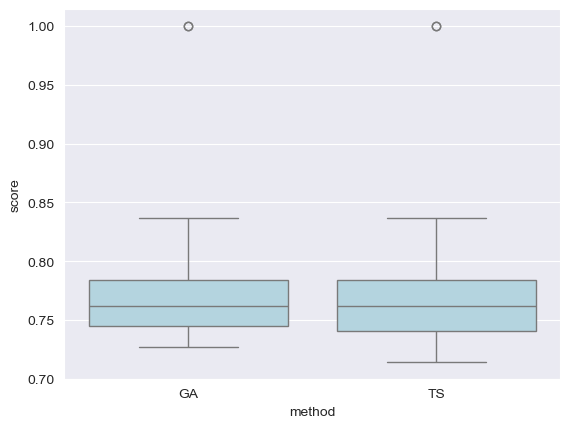

In [8]:
sns.boxplot(x="method",y="score",data=all_df,color="lightblue")

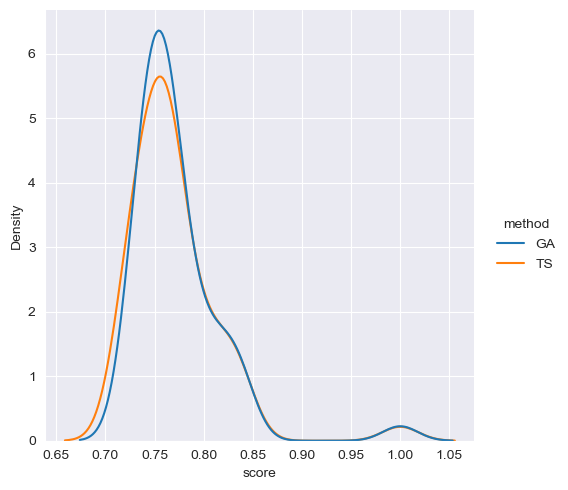

In [9]:
sns.displot(x='score', hue="method",data=all_df,kind="kde");

In [10]:
len(ga_combo_df.head(100).merge(ts_combo_df.head(100),on="SMILES"))

90

In [11]:
exhaustive_df = pd.read_csv("benchmark/benchmark_data/quinazoline_exhaustive.csv")

In [12]:
top_100_df = exhaustive_df.sort_values("score",ascending=False).drop_duplicates("SMILES").head(100)

In [13]:
ga_top_100_df = ga_combo_df.sort_values("score", ascending=False).drop_duplicates("SMILES").head(100)

In [14]:
ts_top_100_df = ts_combo_df.sort_values("score", ascending=False).drop_duplicates("SMILES").head(100)

In [15]:
len(top_100_df.merge(ga_top_100_df,on="SMILES"))

99

In [16]:
len(top_100_df.merge(ts_top_100_df,on="SMILES"))

90

In [17]:
wilcoxon(ga_top_100_df.score, ts_top_100_df.score)

WilcoxonResult(statistic=0.0, pvalue=1.679483202276532e-06)